# Proyecto Individual Data Analytics: Accidentes aéreos

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv('Accidentes_tratado.csv')

## KPIs

### 1) Análisis de la Disminución en un 10% de la tasa anual de accidentes aéreos desde el año 2002 hasta el 2021.

Queremos centrar nuestro análisis en los últimos 20 años de los que poseemos información. Luego de los últimos avances tecnológicos, queremos conocer los años en que a nivel mundial se logro disminuir la tasa anual de accidentes por lo menos en un 10%

In [13]:
#Creamos un dataframe que solo contenga los años que queremos analizar
df_kpi1=df[df['year']>=2002]

In [14]:
#Revisamos el número de accidentes a analizar
df_kpi1.shape

(639, 21)

In [15]:
#Contamos los valores por año
anual_accidents_rate=df_kpi1['year'].value_counts().sort_index()

In [16]:
#Revisamos
anual_accidents_rate

year
2002    55
2003    62
2004    46
2005    45
2006    38
2007    43
2008    51
2009    46
2010    40
2011    36
2012    26
2013    25
2014    23
2015    18
2016    23
2017    15
2018    19
2019    13
2020     8
2021     7
Name: count, dtype: int64

In [17]:
# Calculamos el cambio porcentual anual
annual_accidents_pct_change = anual_accidents_rate.pct_change()

In [18]:
# Resaltamos los años con una disminución del 10%
highlight = annual_accidents_pct_change < -0.09

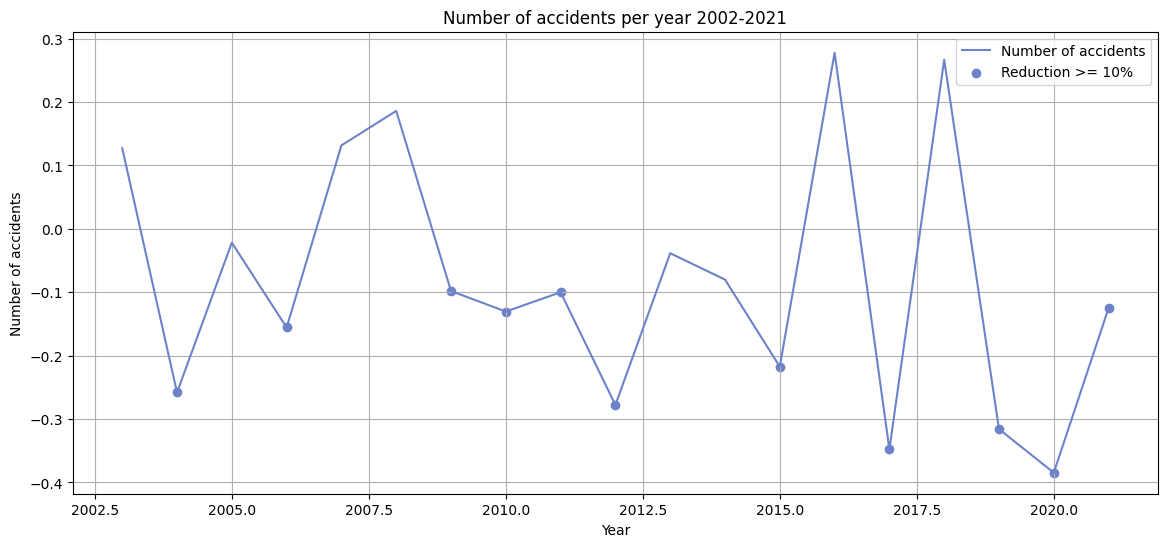

In [19]:
#Graficamos los accidentes del período resaltando los que tienen una disminución del 10% 
plt.figure(figsize=(14, 6))
plt.plot(annual_accidents_pct_change.index, annual_accidents_pct_change.values, label='Number of accidents', color='#6d83c9')
plt.scatter(annual_accidents_pct_change[highlight].index, annual_accidents_pct_change[highlight].values, color='#6d83c9', label='Reduction >= 10%')
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.title('Number of accidents per year 2002-2021')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Contar el número de años en los que se cumplió el KPI
num_years_kpi = highlight.sum()
num_years_kpi

11

Podemos observar que de los 20 años que componen el intervalo, en 11 oportunidades se logró disminuir la tasa anual de accidentes en por lo menos un 10%, es decir, que al menos en un 50% de oportunidades se logró cumplir con el KPI.

### 2) Evaluar la disminución de un 10% la tasa de fatalidad de la tripulación en los últimos 10 años, comparado a la década anterior.<br>


Definimos la tasa de fatalidad de la tripulación como el número total de tripulantes fallecidos en los accidentes registrados en la década a considerar, dividido en la cantidad total de accidentes aéreos ocurridos en este período de tiempo. Su fórmula es (Suma total de fallecidos en el período de tiempo / Suma total de accidentes en el período de tiempo).

Creamos una función que nos permita comparar el crew fatality rate de los ultimos 10 años en función de los 10 años anteriores.

In [21]:
def crew_fatality_rate_per_decade(initial_year):

    #Para la decada actual
    df_decade = df[(df['year'] >= initial_year) & (df['year'] < (initial_year+10))]

    # Calcular la suma total de fallecidos de la tripulación en la década
    total_crew_fatalities= df_decade['crew_fatalities'].sum()

    # Calcular la suma total de accidentes en la década
    total_accidents = len(df_decade)

    # Calcular la Tasa de Fatalidad de la Tripulación en la década
    crew_fatality_rate = total_crew_fatalities / total_accidents


    return round(crew_fatality_rate,2)

Los últimos 10 años de los que tenemos información son del 2012 al 2021, y compararemos esa información con la del 2002-2011

In [22]:
decades_start_years=[2002,2012]
crew_fatality_rates = [crew_fatality_rate_per_decade(year) for year in decades_start_years]
decades_labels = [f"{year}-{year+9}" for year in decades_start_years]


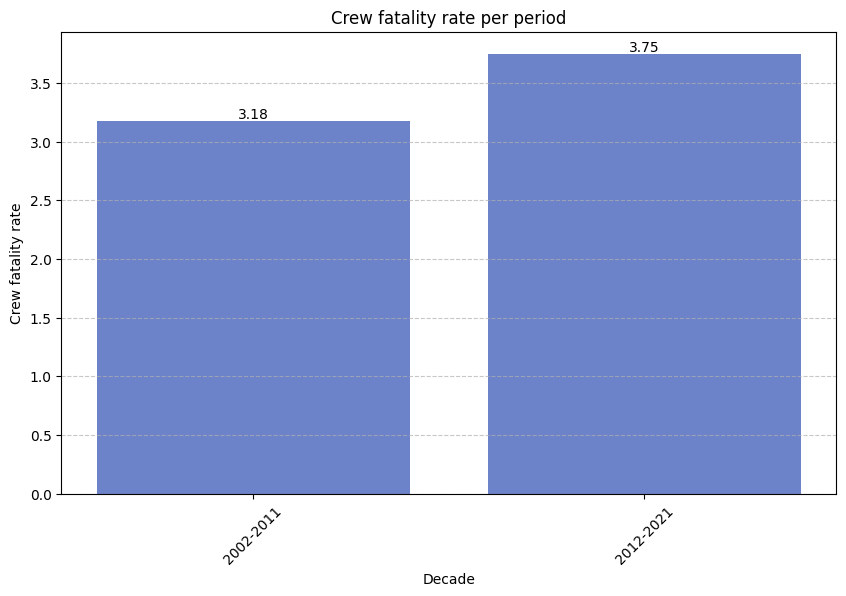

In [23]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(decades_labels, crew_fatality_rates, color='#6d83c9')
plt.title('Crew fatality rate per period')
plt.xlabel('Decade')
plt.ylabel('Crew fatality rate')
plt.xticks(rotation=45)
for i, valor in enumerate(crew_fatality_rates):
    plt.text(i, valor + 0.11, str(valor), ha='center', va='top')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Podemos ver como la tasa en vez de ir disminuyendo, va aumentando, vamos a hacer la comparativa con valores

In [24]:
def crew_fatality_rate_per_decade(initial_year):

    #Para la decada actual
    df_decade = df[(df['year'] >= initial_year) & (df['year'] < (initial_year+10))]

    # Calcular la suma total de fallecidos de la tripulación en la década
    total_crew_fatalities= df_decade['crew_fatalities'].sum()

    # Calcular la suma total de accidentes en la década
    total_accidents = len(df_decade)

    # Calcular la Tasa de Fatalidad de la Tripulación en la década
    crew_fatality_rate = total_crew_fatalities / total_accidents


    return "Crew fatalities:", total_crew_fatalities, "total accidents: ",total_accidents, "Crew fatalities rate", round(crew_fatality_rate,2)

In [25]:
crew_fatality_rate_per_decade(2002)

('Crew fatalities:',
 1471.0,
 'total accidents: ',
 462,
 'Crew fatalities rate',
 3.18)

In [26]:
crew_fatality_rate_per_decade(2012)

('Crew fatalities:',
 664.0,
 'total accidents: ',
 177,
 'Crew fatalities rate',
 3.75)

Podemos ver que la tasa de crew fatality en vez de disminuir ha aumentado pasando de 3.18 a 3.75, aumentando en un:

In [27]:
crecimiento=((3.75-3.18)/3.18)*100
round(crecimiento,2)

17.92

El aumento es casi de un 17.92%.

El análisis que podemos hacer es que si bien el numero de fatalidades de la tripulación en los últimos 10 años ha disminuido respecto de los 10 años anteriores, hemos notado un claro descenso del número de accidentes a casi un tercio de los que eran, lo que produce en un aumento significativo de la tasa de fatalidades de la tripulación. 

Nos llama la atención este valor por lo que seguiremos analizando. Filtramos el período 2012-2021.

In [28]:
df_kpi2=df[df['year']>=2012]

In [29]:
df_kpi2

,date,time,location,airline_operator,route,aircraft_type,all_aboard,passengers_aboard,crew_aboard,total_fatalities,...,crew_fatalities,summary,year,date_time,country,city,accident_on_water,category,survivors,survival_rate
4831,2012-01-30,08:45:00,"Namoya,Congo",TRACEP Congo Aviation,Bukavu - Namoya,Antonov AN-28,5.0,3.0,3.0,3.0,...,2.0,The cargo plane was on approach to land when i...,2012,2012-01-30 08:45:00,Congo,Namoya,False,passenger,2.0,40.00
4832,2012-03-15,07:15:00,"San Juan,Puerto Rico",Jet One Express,San Juan - Saint Croix,Convair CV-340,2.0,0.0,2.0,2.0,...,2.0,The cargo plane just took off and was carrying...,2012,2012-03-15 07:15:00,Puerto Rico,San Juan,False,passenger,0.0,0.00
4833,2012-03-16,10:45:00,"Kabul,Afghanistan",Military - Turkish Army (NATO),Sin Dato,Sikorsky S-70A-28,12.0,NaN,NaN,12.0,...,NaN,The helicopter crashed on the outskirts of Kab...,2012,2012-03-16 10:45:00,Afghanistan,Kabul,False,military,0.0,0.00
4834,2012-04-02,07:44:00,"Tyumen,Russia",UTAir,Tyurmen - Surgut,ATR 72-201,43.0,39.0,4.0,33.0,...,4.0,"After taking off, the plane lost height during...",2012,2012-04-02 07:44:00,Russia,Tyumen,False,passenger,10.0,23.26
4835,2012-04-20,18:40:00,"Islamabad,Pakistan",Bhoja Airlines,Karachi - Islamabad,Boeing 737-236,127.0,121.0,6.0,127.0,...,6.0,"While attempting to land, the plane impacted t...",2012,2012-04-20 18:40:00,Pakistan,Islamabad,False,passenger,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,18:35:00,"Butte,Alaska",Soloy Helicopters,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,6.0,5.0,1.0,5.0,...,1.0,The sightseeing helicopter crashed after missi...,2021,2021-03-28 18:35:00,United States,Butte,False,passenger,1.0,16.67
5004,2021-05-21,18:00:00,"Kaduna,Nigeria",Military - Nigerian Air Force,Sin Dato,Beechcraft B300 King Air 350i,11.0,7.0,4.0,11.0,...,4.0,"While on final approach, in poor weather condi...",2021,2021-05-21 18:00:00,Nigeria,Kaduna,False,military,0.0,0.00
5005,2021-06-10,08:00:00,"Pyin Oo Lwin,Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,14.0,12.0,2.0,12.0,...,1.0,The plane was carrying military personnel and ...,2021,2021-06-10 08:00:00,Myanmar,Pyin Oo Lwin,False,military,2.0,14.29
5006,2021-07-04,11:30:00,"Patikul,Sulu,Philippines",Military - Philippine Air Force,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,96.0,88.0,8.0,50.0,...,NaN,"While attempting to land at Jolo Airport, the ...",2021,2021-07-04 11:30:00,Philippines,"Patikul,Sulu",False,military,46.0,47.92


In [30]:
#Tomamos unicamente las columnas que me interesan comparar
df_kpi2[['crew_aboard','crew_fatalities']].head()

,crew_aboard,crew_fatalities
4831,3.0,2.0
4832,2.0,2.0
4833,NaN,NaN
4834,4.0,4.0
4835,6.0,6.0


In [31]:
#Generamos un contador de la cantidad de registros, donde mueren todas los miembros de la tripulación abordo.
contador = (df_kpi2['crew_aboard'] == df_kpi2['crew_fatalities']).sum()
contador

131

De los 177 accidentes que se producen en el período 2012-2021, en 131 accidentes fallecieron la totalidad de los miembros de la tripulación, proceso que indica que es de esperarse este aumento en la tasa de fatalidades de la tripulación por más de que las variables por separado, tiendan a disminuir. 

### 3) Evaluar  un aumento de un 10% la tasa de supervivencia en los últimos 10 años, comparado a la década anterior.<br>

Se define la tasa de supervivencia como el número de sobrevivientes sobre el número de accidentes ocurridos en el período seleccionado.

In [32]:
#Creamos una función para hallar la tasa de supervivencia
def survivor_rate_per_decade(initial_year):

    #Para la decada actual
    df_decade = df[(df['year'] >= initial_year) & (df['year'] < (initial_year+10))]

    # Calcular la suma total de fallecidos de la tripulación en la década
    total_survivors= df_decade['survivors'].sum()

    # Calcular la suma total de accidentes en la década
    total_accidents = len(df_decade)

    # Calcular la Tasa de Fatalidad de la Tripulación en la década
    survivors_rate = total_survivors / total_accidents


    return round(survivors_rate,2)

In [33]:
#Calculamos para el período deseado los intervalos y la tasa de supervivencia
decades_start_years=[2002,2012]
survivor_rates = [survivor_rate_per_decade(year) for year in decades_start_years]
decades_labels = [f"{year}-{year+9}" for year in decades_start_years]


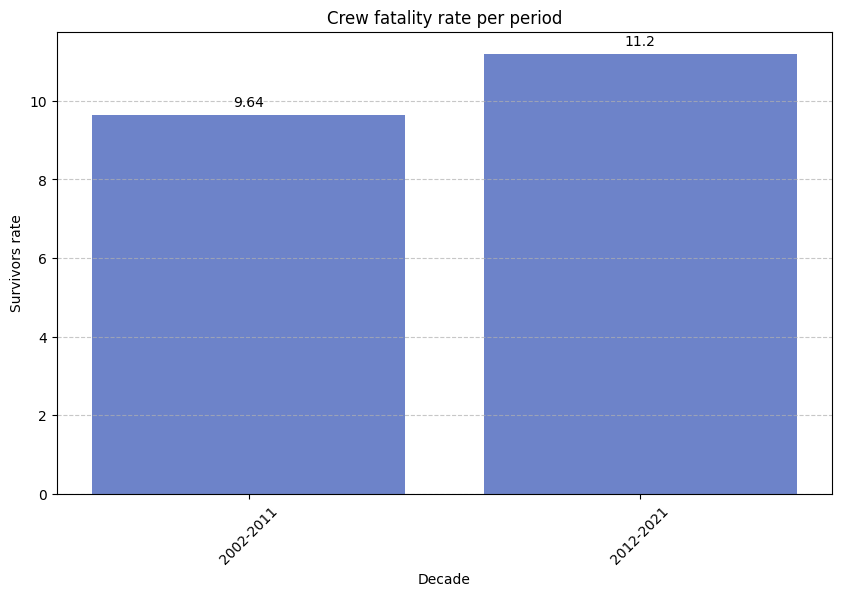

In [34]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(decades_labels, survivor_rates, color='#6d83c9')
plt.title('Crew fatality rate per period')
plt.xlabel('Decade')
plt.ylabel('Survivors rate')
plt.xticks(rotation=45)
for i, valor in enumerate(survivor_rates):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='top')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Podemos ver un claro aumento de la tasa de supervivencia a lo largo de la década evaluada.

In [35]:
def survivor_rate_per_decade(initial_year):

    #Para la decada actual
    df_decade = df[(df['year'] >= initial_year) & (df['year'] < (initial_year+10))]

    # Calcular la suma total de fallecidos de la tripulación en la década
    total_survivors= df_decade['survivors'].sum()

    # Calcular la suma total de accidentes en la década
    total_accidents = len(df_decade)

    # Calcular la Tasa de Fatalidad de la Tripulación en la década
    survivors_rate = total_survivors / total_accidents


    return "Total de sobrevivientes", total_survivors, "Total de accidentes", total_accidents, "Tasa de supervivencia", round(survivors_rate,2)

In [36]:
survivor_rate_per_decade(2002)

('Total de sobrevivientes',
 4453.0,
 'Total de accidentes',
 462,
 'Tasa de supervivencia',
 9.64)

In [37]:
survivor_rate_per_decade(2012)

('Total de sobrevivientes',
 1982.0,
 'Total de accidentes',
 177,
 'Tasa de supervivencia',
 11.2)

Podemos ver que la tasa de supervivencia logra aumenta de 9.64 a 11.2, un aumento de un 16%.

De esta manera cumplimos con el KPI propuesto.